In [1]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For time stamps
from datetime import datetime

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/USD EUR/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

<Figure size 1440x360 with 0 Axes>

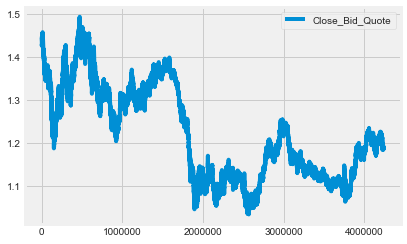

In [3]:
plt.figure(figsize=(20,5))
data.plot()

In [4]:
data.head

<bound method NDFrame.head of                    Timestamp  Close_Bid_Quote
0        2010-01-03 17:01:00          1.43030
1        2010-01-03 17:02:00          1.43030
2        2010-01-03 17:03:00          1.43020
3        2010-01-03 17:04:00          1.43000
4        2010-01-03 17:06:00          1.43010
...                      ...              ...
4236668  2021-06-30 23:54:00          1.18499
4236669  2021-06-30 23:55:00          1.18499
4236670  2021-06-30 23:56:00          1.18505
4236671  2021-06-30 23:57:00          1.18515
4236672  2021-06-30 23:58:00          1.18506

[4236673 rows x 2 columns]>

In [5]:
data['Timestamp'].min()

'2010-01-03 17:01:00'

In [6]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [7]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [8]:
data = data.resample("D").max()

In [9]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

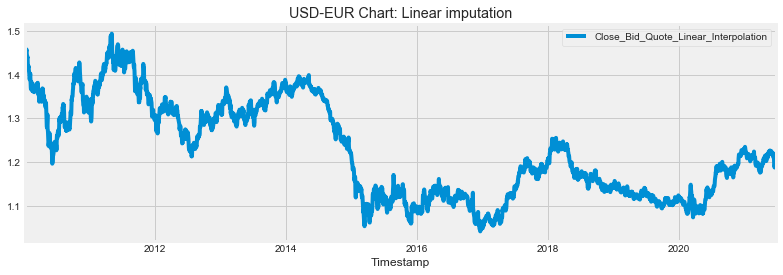

In [10]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('USD-EUR Chart: Linear imputation')
plt.show(block=False)

In [11]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [12]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

In [13]:
data.head()

,Close_Bid_Quote
Timestamp,
2010-01-03,1.4335
2010-01-04,1.4451
2010-01-05,1.4481
2010-01-06,1.4443
2010-01-07,1.4402


In [14]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24

In [15]:
len(test)

840

In [16]:
len(train)

3357

In [17]:
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .80 ))
training_data_len

3358

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.86703246],
       [0.89269674],
       [0.89933406],
       ...,
       [0.3379942 ],
       [0.33323746],
       [0.33005155]])

In [19]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets

In [20]:
# Create the training data set 
# Create the scaled training data set

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.86703246, 0.89269674, 0.89933406, 0.89092679, 0.88185579,
       0.8889356 , 0.89977654, 0.91061749, 0.91526361, 0.91349366,
       0.92057346, 0.91526361, 0.88959933, 0.88296201, 0.8763247 ,
       0.88406823, 0.88362574, 0.84158942, 0.8243324 , 0.83296091,
       0.83196531, 0.83096971, 0.83583708, 0.81681011, 0.8117215 ,
       0.80375672, 0.78937587, 0.77864555, 0.76791522, 0.77897741,
       0.78738468, 0.79800438, 0.76968517, 0.73539238, 0.72720635,
       0.71902033, 0.7289763 , 0.75685303, 0.75087944, 0.74866701,
       0.72322397, 0.71713976, 0.71105555, 0.71525919, 0.74402089,
       0.74601208, 0.71592292, 0.70795814, 0.71194053, 0.71592292,
       0.71304675, 0.72410894, 0.70972809, 0.704197  , 0.72233899,
       0.71846722, 0.71459546, 0.71548043, 0.71548043, 0.73384367])]
[0.7243301842961127]

[array([0.86703246, 0.89269674, 0.89933406, 0.89092679, 0.88185579,
       0.8889356 , 0.89977654, 0.91061749, 0.91526361, 0.91349366,
       0.92057346, 0.91526361, 0.889

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
104/104 [==============================] - 17s 73ms/step - loss: 0.0234
Epoch 2/10
104/104 [==============================] - 10s 97ms/step - loss: 7.9692e-04
Epoch 3/10
104/104 [==============================] - 10s 96ms/step - loss: 7.7949e-04 0s - loss: 
Epoch 4/10
104/104 [==============================] - 11s 101ms/step - loss: 6.9064e-04
Epoch 5/10
104/104 [==============================] - 11s 106ms/step - loss: 6.7277e-04
Epoch 6/10
104/104 [==============================] - 11s 106ms/step - loss: 6.5790e-04
Epoch 7/10
104/104 [==============================] - 11s 106ms/step - loss: 5.2735e-04
Epoch 8/10
104/104 [==============================] - 12s 120ms/step - loss: 5.5644e-04
Epoch 9/10
104/104 [==============================] - 11s 101ms/step - loss: 5.4242e-04
Epoch 10/10
104/104 [==============================] - 11s 105ms/step - loss: 3.9584e-04


In [22]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

0.006184290220090306

C:\Users\Hitesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


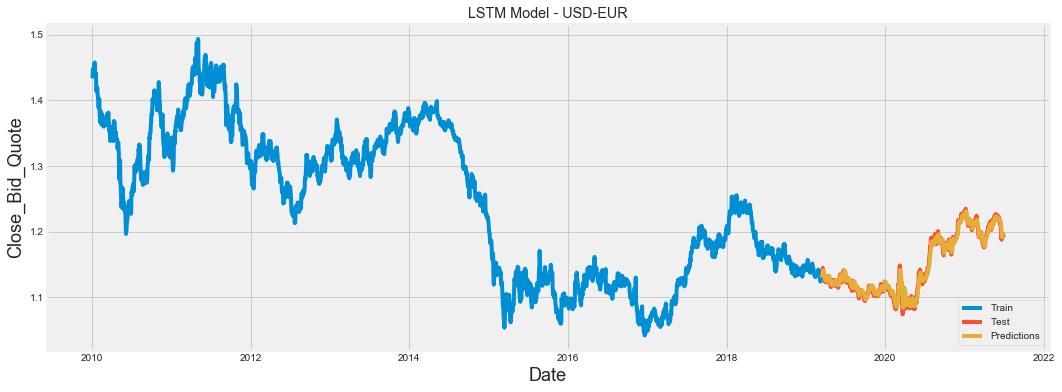

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('LSTM Model - USD-EUR')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Bid_Quote', fontsize=18)
plt.plot(train['Close_Bid_Quote'])
plt.plot(valid[['Close_Bid_Quote', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [24]:
# Show the valid and predicted prices
valid

,Close_Bid_Quote,Predictions
Timestamp,,
2019-03-15,1.134410,1.130000
2019-03-16,1.134120,1.131782
2019-03-17,1.133830,1.133246
2019-03-18,1.135870,1.134256
2019-03-19,1.136130,1.135210
...,...,...
2021-06-26,1.195765,1.194368
2021-06-27,1.194150,1.195463
2021-06-28,1.194380,1.195917
